In [28]:
import pandas as pd
df=pd.read_csv("c:/data/ozone/ozone2.csv")
df.head()

,Unnamed: 0,Ozone,Unnamed: 2,Solar.R,Wind,Temp,result
0,41.0,41.00000,190.0,190.000000,7.4,67,0
1,36.0,36.00000,118.0,118.000000,8.0,72,0
2,12.0,12.00000,149.0,149.000000,12.6,74,0
3,18.0,18.00000,313.0,313.000000,11.5,62,0
4,NaN,42.12931,NaN,185.931507,14.3,56,1


In [29]:
df.columns

Index(['Unnamed: 0', 'Ozone', 'Unnamed: 2', 'Solar.R', 'Wind', 'Temp',
       'result'],
      dtype='object')

In [30]:
df.shape

(153, 7)

In [31]:
df.describe()

,Unnamed: 0,Ozone,Unnamed: 2,Solar.R,Wind,Temp,result
count,116.000000,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,42.129310,185.931507,185.931507,9.957516,77.882353,0.529412
std,32.987885,28.693372,90.058422,87.960267,3.523001,9.465270,0.500773
min,1.000000,1.000000,7.000000,7.000000,1.700000,56.000000,0.000000
25%,18.000000,21.000000,115.750000,120.000000,7.400000,72.000000,0.000000
50%,31.500000,42.129310,205.000000,194.000000,9.700000,79.000000,1.000000
75%,63.250000,46.000000,258.750000,256.000000,11.500000,85.000000,1.000000
max,168.000000,168.000000,334.000000,334.000000,20.700000,97.000000,1.000000


In [32]:
df.groupby("result").mean()

,Unnamed: 0,Ozone,Unnamed: 2,Solar.R,Wind,Temp
result,,,,,,
0,20.902778,20.902778,165.449275,166.302702,11.270833,72.652778
1,76.863636,60.997339,204.285714,203.379334,8.790123,82.530864


In [33]:
df["result"].value_counts()

1    81
0    72
Name: result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류 \n(0: 부족, 1: 정상)')

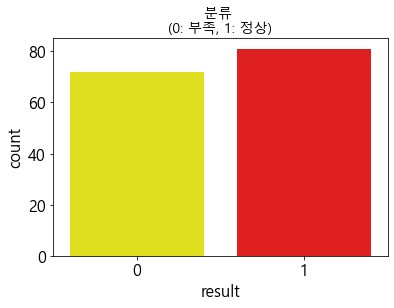

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
colors=["yellow","red"]

sns.countplot('result',data=df, palette=colors)
plt.title('분류 \n(0: 부족, 1: 정상)',fontsize=14)

In [35]:
cols=['Solar.R','Wind','Temp']
X= df[cols]
y=df['result']

array([[<AxesSubplot:xlabel='Solar.R', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Wind', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Temp', ylabel='Solar.R'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Wind'>,
        <AxesSubplot:xlabel='Wind', ylabel='Wind'>,
        <AxesSubplot:xlabel='Temp', ylabel='Wind'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Temp'>,
        <AxesSubplot:xlabel='Wind', ylabel='Temp'>,
        <AxesSubplot:xlabel='Temp', ylabel='Temp'>]], dtype=object)

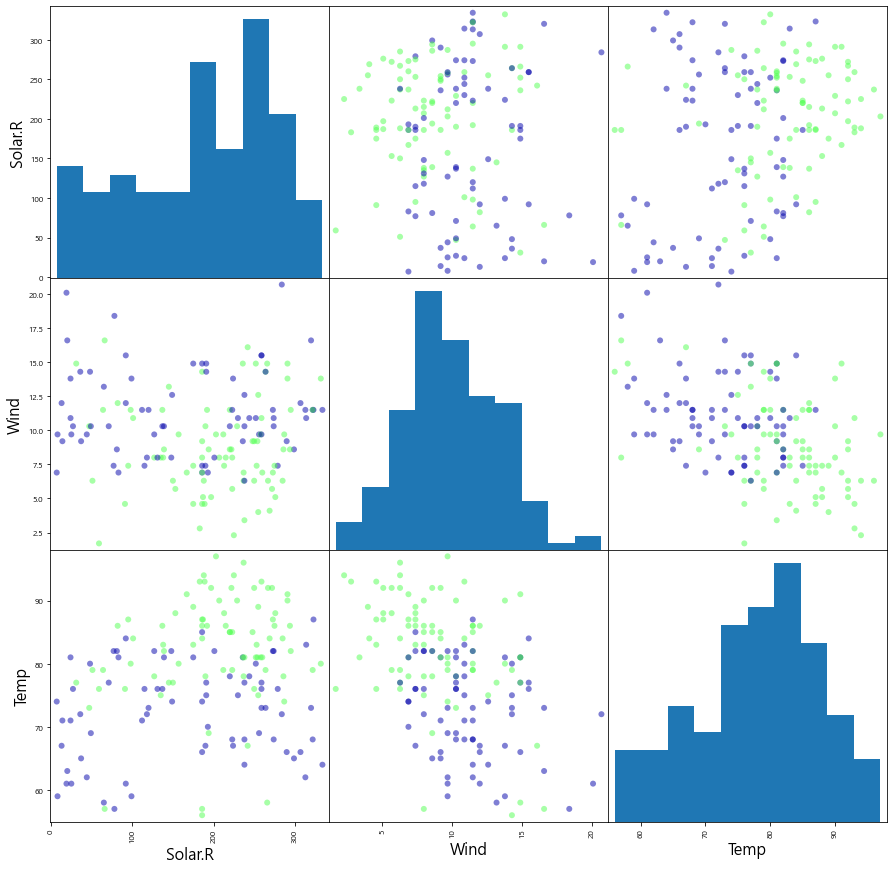

In [36]:
import mglearn
pd.plotting.scatter_matrix(X, c=y, figsize=(15,15),marker='o',cmap=mglearn.cm3)

In [37]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample,columns=cols)
y_samp=pd.DataFrame(data=y_sample,columns=['result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [38]:
from imblearn.over_sampling import SMOTE

X_sample, y_sample=SMOTE(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample,columns=cols)
y_samp=pd.DataFrame(data=y_sample,columns=['result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [39]:
df_samp['result'].value_counts()

0    81
1    81
Name: result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0:부족, 1:정상)')

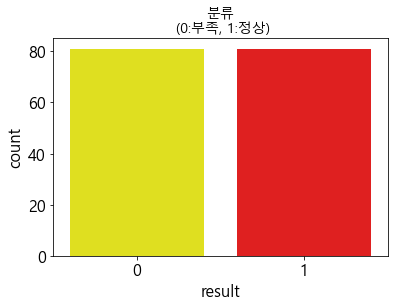

In [40]:
colors=["yellow","red"]
sns.countplot('result', data=df_samp, palette=colors)
plt.title('분류\n (0:부족, 1:정상)', fontsize=14)

In [41]:
cols=['Solar.R', 'Wind', 'Temp']
X = X_samp[cols]
y = y_samp['result']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=10)

최적의 k: 4


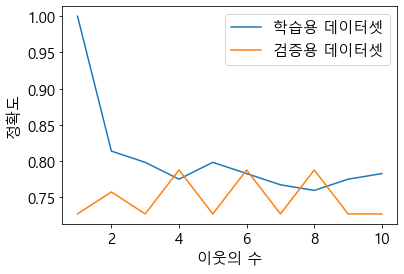

In [43]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

train_rate=[]
test_rate=[]
neighbors=range(1,11)

for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    train_rate.append(knn.score(X_train,y_train))
    test_rate.append(knn.score(X_test,y_test))

plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="학습용 데이터셋") 
plt.plot(neighbors, test_rate, label="검증용 데이터셋") 
plt.ylabel("정확도") 
plt.xlabel("이웃의 수") 
plt.legend()
max_rate=max(test_rate)
idx=np.argmax(test_rate)
print('최적의 k:',idx+1)

In [44]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
import numpy as np
pred=model.predict(X_test)
print("학습용:",model.score(X_train, y_train)) 
print("검증용:",model.score(X_test, y_test)) 
print("검증용:",np.mean(pred == y_test)) 

학습용: 0.7984496124031008
검증용: 0.7272727272727273
검증용: 0.7272727272727273


In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred)
cm

array([[11,  4],
       [ 5, 13]], dtype=int64)

In [47]:
df_cm=pd.DataFrame(cm, index=[0, 1],columns=[0, 1])
df_cm

,0,1
0,11,4
1,5,13


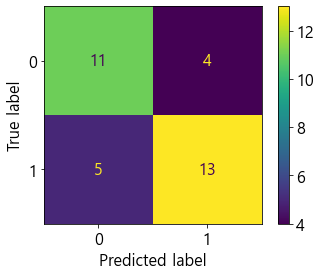

In [48]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(model, X_test, y_test)